In [24]:
import numpy as np
import pandas as pd

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [33]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [34]:
train['is_test'] = 0
test['is_test'] = 1

In [35]:
df = pd.concat([train, test])

In [36]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})

In [37]:
df.drop(['Sex', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [38]:
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,is_test,isMale
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,0,0
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1


In [39]:
pd.get_dummies(df, columns=['Pclass', 'Embarked']);

In [40]:
df['name_len'] = df.Name.str.len()

In [41]:
df['count_words_in_name'] = df.Name.str.split().str.len()

In [42]:
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,is_test,isMale,name_len,count_words_in_name
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1,23,4
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,0,0,51,7
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0,0,22,3
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,0,0,44,7
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1,24,4


In [43]:
df[:1].Name.str.split().apply(lambda x: 'Mr.' in x).astype(int)

0    1
Name: Name, dtype: int32

In [44]:
df['Mr._in_Name']= df.Name.str.split().apply(lambda x: 'Mr.' in x).astype(int)
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,is_test,isMale,name_len,count_words_in_name,Mr._in_Name
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1,23,4,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,0,0,51,7,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0,0,22,3,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,0,0,44,7,0
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1,24,4,1


In [45]:
df['Mrs._in_Name']= df.Name.str.split().apply(lambda x: 'Mrs.' in x).astype(int)

In [46]:
df['Miss._in_Name']= df.Name.str.split().apply(lambda x: 'Miss.' in x).astype(int)

In [47]:
df['Master._in_Name']= df.Name.str.split().apply(lambda x: 'Master' in x).astype(int)

In [48]:
df.drop('Name', axis=1, inplace=True)

In [49]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [50]:
df_dummies.head(1)

,Age,SibSp,Parch,Fare,is_test,isMale,name_len,count_words_in_name,Mr._in_Name,Mrs._in_Name,Miss._in_Name,Master._in_Name,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.25,0,1,23,4,1,0,0,0,0,0,1,0,0,1


In [51]:
df_dummies.isnull().sum()

Age                    263
SibSp                    0
Parch                    0
Fare                     1
is_test                  0
isMale                   0
name_len                 0
count_words_in_name      0
Mr._in_Name              0
Mrs._in_Name             0
Miss._in_Name            0
Master._in_Name          0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
dtype: int64

In [52]:
df_dummies;

In [53]:
X_train = df_dummies[df_dummies['is_test'] == 0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies['is_test'] == 1].drop('is_test', axis=1)

In [54]:
X_train.isnull().sum()

Age                    177
SibSp                    0
Parch                    0
Fare                     0
isMale                   0
name_len                 0
count_words_in_name      0
Mr._in_Name              0
Mrs._in_Name             0
Miss._in_Name            0
Master._in_Name          0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
dtype: int64

In [55]:
columns = X_train.columns
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputer.fit(X_train)
X_train_imp= imputer.transform(X_train)
X_train_imp = pd.DataFrame(X_train_imp, columns=columns)

In [56]:
X_train_imp.head()

,Age,SibSp,Parch,Fare,isMale,name_len,count_words_in_name,Mr._in_Name,Mrs._in_Name,Miss._in_Name,Master._in_Name,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1.0,0.0,7.2500,1.0,23.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1.0,0.0,71.2833,0.0,51.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0.0,0.0,7.9250,0.0,22.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1.0,0.0,53.1000,0.0,44.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,8.0500,1.0,24.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [57]:
X_test.isnull().sum()


Age                    86
SibSp                   0
Parch                   0
Fare                    1
isMale                  0
name_len                0
count_words_in_name     0
Mr._in_Name             0
Mrs._in_Name            0
Miss._in_Name           0
Master._in_Name         0
Pclass_1                0
Pclass_2                0
Pclass_3                0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
dtype: int64

In [58]:
columns = X_test.columns
imputer.fit(X_test)
X_test_imp= imputer.transform(X_test)
X_test_imp = pd.DataFrame(X_test_imp, columns=columns)

In [59]:
X_test_imp.isnull().sum()

Age                    0
SibSp                  0
Parch                  0
Fare                   0
isMale                 0
name_len               0
count_words_in_name    0
Mr._in_Name            0
Mrs._in_Name           0
Miss._in_Name          0
Master._in_Name        0
Pclass_1               0
Pclass_2               0
Pclass_3               0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
dtype: int64

In [60]:
X_test.shape

(418, 17)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [62]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [63]:
%%time
gridsearch.fit(X_train_imp, y_train)

Wall time: 712 ms


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [64]:
sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.46775, std: 0.03261, params: {'max_depth': 2},
 mean: -0.49077, std: 0.11109, params: {'max_depth': 3},
 mean: -0.51431, std: 0.02504, params: {'max_depth': 1},
 mean: -0.80700, std: 0.13276, params: {'max_depth': 4},
 mean: -1.68463, std: 0.26274, params: {'max_depth': 5},
 mean: -2.03801, std: 0.48798, params: {'max_depth': 6},
 mean: -3.18124, std: 0.38531, params: {'max_depth': 7},
 mean: -4.05979, std: 0.89453, params: {'max_depth': 8},
 mean: -4.60217, std: 1.26280, params: {'max_depth': 9}]

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


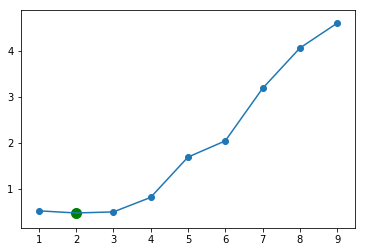

In [65]:
scores = [-x.mean_validation_score for x in gridsearch.grid_scores_]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [76]:
clf_final = DecisionTreeClassifier(max_depth=3)

In [77]:
clf_final.fit(X_train_imp, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
y_pred_proba = clf_final.predict_proba(X_test_imp)
y_pred = clf_final.predict(X_test_imp)

In [79]:
y_pred_proba

array([[0.90641711, 0.09358289],
       [0.3828125 , 0.6171875 ],
       [0.90641711, 0.09358289],
       [0.90641711, 0.09358289],
       [0.3828125 , 0.6171875 ],
       [0.90641711, 0.09358289],
       [0.3828125 , 0.6171875 ],
       [0.72072072, 0.27927928],
       [0.3828125 , 0.6171875 ],
       [0.90641711, 0.09358289],
       [0.90641711, 0.09358289],
       [0.90641711, 0.09358289],
       [0.05294118, 0.94705882],
       [0.90641711, 0.09358289],
       [0.05294118, 0.94705882],
       [0.05294118, 0.94705882],
       [0.90641711, 0.09358289],
       [0.90641711, 0.09358289],
       [0.3828125 , 0.6171875 ],
       [0.3828125 , 0.6171875 ],
       [0.72072072, 0.27927928],
       [0.3828125 , 0.6171875 ],
       [0.05294118, 0.94705882],
       [0.72072072, 0.27927928],
       [0.05294118, 0.94705882],
       [0.90641711, 0.09358289],
       [0.05294118, 0.94705882],
       [0.90641711, 0.09358289],
       [0.72072072, 0.27927928],
       [0.90641711, 0.09358289],
       [0.

([<matplotlib.axis.YTick at 0xbb8fb54a20>,
 <a list of 17 Text yticklabel objects>)

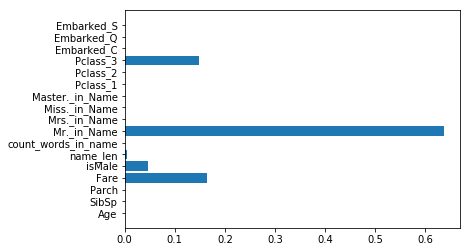

In [80]:

plt.barh(np.arange(len(clf_final.feature_importances_)), clf_final.feature_importances_)
plt.yticks(np.arange(len(X_train_imp.columns)),X_train_imp.columns)

In [81]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))
    

http://www.webgraphviz.com

In [82]:
get_tree_dot_view(clf_final, list(X_train_imp.columns))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Mr._in_Name <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Pclass_3 <= 0.5\ngini = 0.422\nsamples = 374\nvalue = [113, 261]", fillcolor="#399de591"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="isMale <= 0.5\ngini = 0.209\nsamples = 202\nvalue = [24, 178]", fillcolor="#399de5dd"] ;
1 -> 2 ;
3 [label="gini = 0.1\nsamples = 170\nvalue = [9, 161]", fillcolor="#399de5f1"] ;
2 -> 3 ;
4 [label="gini = 0.498\nsamples = 32\nvalue = [15, 17]", fillcolor="#399de51e"] ;
2 -> 4 ;
5 [label="Fare <= 23.35\ngini = 0.499\nsamples = 172\nvalue = [89, 83]", fillcolor="#e5813911"] ;
1 -> 5 ;
6 [label="gini = 0.473\nsamples = 128\nvalue = [49, 79]", fillcolor="#399de561"] ;
5 -> 6 ;
7 [label="gini = 0.165\nsamples = 44\nvalue = [40, 4]", fillcolor="#e58139e6"] ;
5 -> 7 ;
8 [label="Fare <= 26.269\ngini = 0.264\nsamples = 517\nvalue = [436, 81]", fillcolor="#e

In [83]:
gender_submission = pd.read_csv('gender_submission.csv')

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(gender_submission['Survived'], y_pred)

0.9234449760765551

In [85]:
gender_submission['Survived'] == y_pred

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21     False
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
388     True
389    False
390     True
391     True
392    False
393     True
394     True
395     True
396     True
397     True
398     True
399     True
400     True
401     True
402     True
403     True
404     True
405     True
406     True
407     True
408     True
409     True
410     True
411     True
412     True
413     True
414     True
415     True
416     True
417    False
Name: Survived, Length: 418, dtype: bool

In [164]:
submit = pd.DataFrame(y_pred_proba, columns=gender_submission.columns[1:])
submit['ID'] = gender_submission.ID
submit = submit[[submit.columns[-1]]+list(submit.columns[:-1])]
submit.to_csv('submit.csv', index=False)

ValueError: Shape of passed values is (2, 418), indices imply (1, 418)